## Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, RandomizedSearchCV

## Data Loading

In [2]:
df= pd.read_csv("data/Bengaluru_House_Data_cleaned.csv")

## Choose Relevant columns 

In [3]:
df.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'bedroom', 'ready_to_move'],
      dtype='object')

In [4]:
df_model = df[['location', 'total_sqft', 'price', 'bedroom', 'ready_to_move']]

- 'bath' is strongly correlated with 'bedroom', so we drop it to avoid multicollinearity
- 'balcony' has low correlation with 'price', so we drop it

## Get dummy data

In [5]:
df_dum = pd.get_dummies(df_model)

## Train Test Split

In [6]:
X = df_dum.drop(['price'], axis =1)
y = df_dum['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## OLS Regression

In [8]:
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     104.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:26:37   Log-Likelihood:                -39326.
No. Observations:                7692   AIC:                         7.913e+04
Df Residuals:                    7455   BIC:                         8.077e+04
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -28.3058      1.755    -16.126      0.000     -31.747     -24.865
total_sqft                               0.0849      0.001     72.673      0.000       0.083       0.087
bedroom                                  2.4293      0.648      3.747      0.000       1.158       3.700
ready_to_move                            0.4217      1.302      0.324      0.746      -2.131       2.975
location_1st Block Jayanagar            81.4836     10.934      7.452      0.000      60.049     102.918
location_1st Phase JP Nagar             24.6430     10.187      2.419      0.016       4.673      44.613
location_2nd Stage Nagarbhavi          131.4728      9.698     13.556      0.000     112.462     150.484
location_5th Block Hbr Layout           26.6603     12.297      2.168      0.030       2.555      50.765
location_5th Phase JP Nagar            -22.4382      7.853     -2.857      0.004     -37.832      -7.045
location_6th Phase JP Nagar              7.8865     10.521      0.750      0.454     -12.738      28.511
location_7th Phase JP Nagar             -5.7443      4.140     -1.388      0.165     -13.860       2.371
location_8th Phase JP Nagar            -25.8222      7.226     -3.573      0.000     -39.987     -11.657
location_9th Phase JP Nagar            -20.4961      8.334     -2.459      0.014     -36.832      -4.160
location_AECS Layout                   -17.1563     12.876     -1.332      0.183     -42.397       8.084
location_Abbigere                      -33.8480     11.297     -2.996      0.003     -55.994     -11.702
location_Akshaya Nagar                 -25.7322      6.097     -4.221      0.000     -37.683     -13.781
location_Ambalipura                     -9.5859      9.350     -1.025      0.305     -27.914       8.743
location_Ambedkar Nagar                -14.2230      8.705     -1.634      0.102     -31.287       2.841
location_Amruthahalli                  -10.9849     10.190     -1.078      0.281     -30.960       8.990
location_Anandapura                    -18.1370      8.897     -2.038      0.042     -35.578      -0.696
location_Ananth Nagar                  -27.0641      8.514     -3.179      0.001     -43.755     -10.373
location_Anekal                        -17.0059      8.703     -1.954      0.051     -34.066       0.054
location_Anjanapura                    -32.3607     11.756     -2.753      0.006     -55.406      -9.316
location_Ardendale                     -26.8437      9.886     -2.715      0.007     -46.222      -7.465
location_Arekere                       -14.1542     10.886     -1.300      0.194     -35.494       7.186
location_Attibele                      -11.2006      7.874     -1.423      0.155     -26.636       4.234
location_BTM 2nd Stage                

About 76% of the variability in the “price” can be explained by the involved features (adjusted R-squared: 0.761).

## Lineaer Regression

In [9]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)

In [10]:
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv))

-23.128249765599143

## LASSO

In [11]:
lm_l = Lasso()
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv))

-28.82802646084074

Try to find the best alpha value.

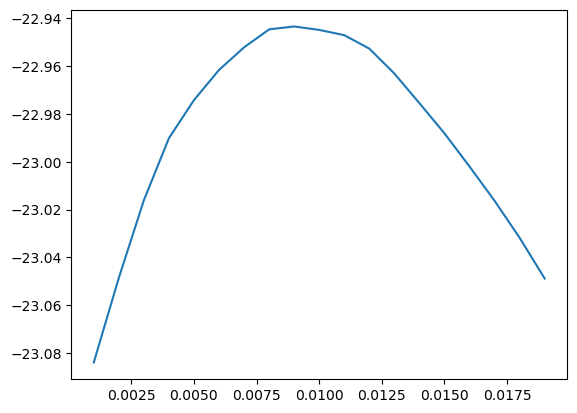

In [13]:
alpha = []
error = []

for i in range(1, 20):
    alpha.append(i / 1000)
    lml = Lasso(alpha = (i / 1000))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv)))
    
plt.plot(alpha, error)

In [14]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
8,0.009,-22.943464


The alpha value with the lowest negative MAE is 0.009.

In [15]:
lm_l = Lasso(alpha = 0.009)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = cv))

-22.94346362972399

The negative MAE improves from -28.83 to -22.94 after setting alpha = 0.009.

## Random Forest

In [17]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= cv))

-18.94547925158961

Random Forest performs the best among the other 2 models. We will use RandomizedSearchCV to find the best parameters.

In [17]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [18]:
rs = RandomizedSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv = cv)

In [19]:
rs.fit(X_train,y_train)

C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarnin

C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: 

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
                   estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ('mse', 'mae'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'n_estimators': range(10, 300, 10)},
                   scoring='neg_mean_absolute_error')

In [20]:
rs.best_score_

-17.74443160032494

The negative MAE of the model improves from -18.95 to -17.74 after the parameter tuning.

In [21]:
rs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=90)

In [20]:
rf = RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=90)
rf.fit(X_train, y_train)

C:\Users\garyt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=90)

## MAE

In [21]:
pred_lm = lm.predict(X_test)
pred_lml = lm_l.predict(X_test)
pred_rf = rf.predict(X_test)

In [31]:
mae_lm = round(mean_absolute_error(y_test, pred_lm), 2)
mae_lml = round(mean_absolute_error(y_test, pred_lml), 2)
mae_rf = round(mean_absolute_error(y_test, pred_rf), 2)

In [32]:
print(f'MAE (Linear Regression): {mae_lm}')
print(f'MAE (LASSO Regression): {mae_lml}')
print(f'MAE (Random Forest Regression): {mae_rf}')

MAE (Linear Regression): 25.37
MAE (LASSO Regression): 25.32
MAE (Random Forest Regression): 18.77


## MAPE

In [33]:
def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [35]:
mape_lm = round(mape(y_test, pred_lm), 2)
mape_lml = round(mape(y_test, pred_lml), 2)
mape_rf = round(mape(y_test, pred_rf), 2)

In [38]:
print(f'MAPE (Linear Regression): {mape_lm}%')
print(f'MAPE (LASSO Regression): {mape_lml}%')
print(f'MAPE (Random Forest Regression): {mape_rf}%')

MAPE (Linear Regression): 27.33%
MAPE (LASSO Regression): 27.14%
MAPE (Random Forest Regression): 17.66%


In [40]:
import pickle
with open('bangalore_house_price_perdiction_model.pickle', 'wb') as f:
    pickle.dump(rf, f)

In [41]:
X.columns

Index(['total_sqft', 'bedroom', 'ready_to_move',
       'location_1st Block Jayanagar', 'location_1st Phase JP Nagar',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       'location_7th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=237)

In [ ]:
import json